<a href="https://colab.research.google.com/github/sagar2582/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in TensorFlow

Predicting numerical variable based on some other combinations of variables.

In [9]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating some data to view and fit


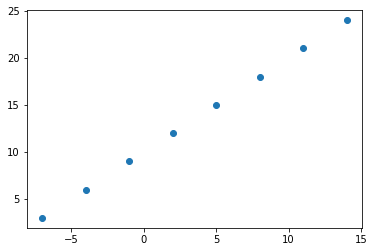

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Input and output shapes

In [11]:
# Create a demo tensor for our housing peice prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [12]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [13]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels)

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Squential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd - stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 279ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.9748 - mae: 10.9748


In [15]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred # 11 points off then where it should be

1/1 [==============================] - 0s 48ms/step


array([[12.716021]], dtype=float32)

In [18]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving a Model

we can improve our model by: 
1. **Creting a model** : add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model**: change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model**: fit model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [21]:
# Let's rebuild our model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 434ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0

In [22]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [23]:
model.predict([17.0])

1/1 [==============================] - 0s 86ms/step


array([[29.739855]], dtype=float32)

In [28]:
# Let's try to improve the model by adding an extra hidden layer with 100 hidden units.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 747ms/step - loss: 12.1456 - mae: 12.1456
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5538 - mae: 11.5538
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 10.9405 - mae: 10.9405
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.3009 - mae: 10.3009
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 9.6325 - mae: 9.6325
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.9314 - mae: 8.9314
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 8.1937 - mae: 8.1937
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.3997 - mae: 7.3997
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 6.5612 - mae: 6.5612
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 5.6630 - mae: 5.6630
Epoch 11/100
1/1 [==============================] - 0s 12ms/st

In [29]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [30]:
model.predict([17.0])

1/1 [==============================] - 0s 135ms/step


array([[32.45491]], dtype=float32)